In [1]:
import os
from pathlib import Path

cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent)

In [2]:
import pandas as pd
from mllm_emotion_classifier.utils import (
    add_fairness_metrics_by_emotion,
    add_fairness_metrics_by_emotion,
    plot_fairness_vs_hparam,
    plot_fairness_by_emotion,
    FigureCollector,
)

In [3]:
hparam = 'top_p' # or 'top_p'
assert hparam in ['temperature', 'top_p'], "hparam must be either 'temperature' or 'top_p'"

dataset = 'cremad'
fold = 1 # Set to an integer fold number if needed, else None to aggregate all folds
model = 'qwen2-audio-instruct'

metadata_dir = Path('EmoBox/data/')
dataset_path = metadata_dir / dataset
n_folds = len([d for d in dataset_path.iterdir() if d.is_dir() and d.name.startswith("fold_")])
out_dir = Path('outputs') / "temperature_runs" if hparam == 'temperature' else Path('outputs') / "topp_runs"

if fold is None:
    dfs = []
    for f in range(1, n_folds + 1):
        results_csv = out_dir / model / dataset / f'fold_{f}.csv'
        df_fold = pd.read_csv(results_csv)
        dfs.append(df_fold)
    df = pd.concat(dfs, ignore_index=True)
else:
    results_csv = out_dir / model / dataset / f'fold_{fold}.csv'
    df = pd.read_csv(results_csv)

print(len(df), "rows")
df.head(5)

6 rows


,run,dataset,fold,model,prompt,top_p,valid_rate,global_f1_macro,global_f1_weighted,global_accuracy_unweighted,...,language_English_classwise_negative_predictive_value_Fear,language_English_classwise_negative_predictive_value_Happy,language_English_classwise_negative_predictive_value_Neutral,language_English_classwise_negative_predictive_value_Sad,language_English_classwise_f1_score_Angry,language_English_classwise_f1_score_Disgust,language_English_classwise_f1_score_Fear,language_English_classwise_f1_score_Happy,language_English_classwise_f1_score_Neutral,language_English_classwise_f1_score_Sad
0,0,cremad,1,qwen2-audio-instruct,user_labels,0.0001,1.0,0.7049,0.7007,0.7233,...,0.8879,0.9742,0.9909,0.9880,0.8817,0.4208,0.5553,0.8935,0.8771,0.6012
1,0,cremad,1,qwen2-audio-instruct,user_labels,0.3000,1.0,0.6963,0.6924,0.7003,...,0.8766,0.9665,0.9742,0.9916,0.8991,0.4895,0.4787,0.8964,0.8534,0.5605
2,1,cremad,1,qwen2-audio-instruct,user_labels,0.0001,1.0,0.7973,0.7958,0.7967,...,0.9169,0.9709,0.9858,0.9657,0.9060,0.7401,0.6979,0.9125,0.8557,0.6716
3,1,cremad,1,qwen2-audio-instruct,user_labels,0.3000,1.0,0.7616,0.7593,0.7656,...,0.9013,0.9647,0.9889,0.9825,0.8956,0.6515,0.6327,0.8923,0.8509,0.6462
4,2,cremad,1,qwen2-audio-instruct,user_labels,0.0001,1.0,0.7851,0.7832,0.7891,...,0.9008,0.9713,0.9877,0.9603,0.8975,0.7532,0.6311,0.8992,0.8630,0.6667


In [38]:
run = None
df = add_fairness_metrics_by_emotion(df, ['Angry', 'Neutral', 'Sad', 'Happy'], sensitive_attr='gender', fairness_name='statistical_parity', run=run)
df = add_fairness_metrics_by_emotion(df, ['Angry', 'Neutral', 'Sad', 'Happy'], sensitive_attr='gender', fairness_name='equal_opportunity', run=run)
df = add_fairness_metrics_by_emotion(df, ['Angry', 'Neutral', 'Sad', 'Happy'], sensitive_attr='gender', fairness_name='equal_non_opportunity', run=run)
df = add_fairness_metrics_by_emotion(df, ['Angry', 'Neutral', 'Sad', 'Happy'], sensitive_attr='gender', fairness_name='predictive_parity', run=run)
df = add_fairness_metrics_by_emotion(df, ['Angry', 'Neutral', 'Sad', 'Happy'], sensitive_attr='gender', fairness_name='negative_predictive_parity', run=run)

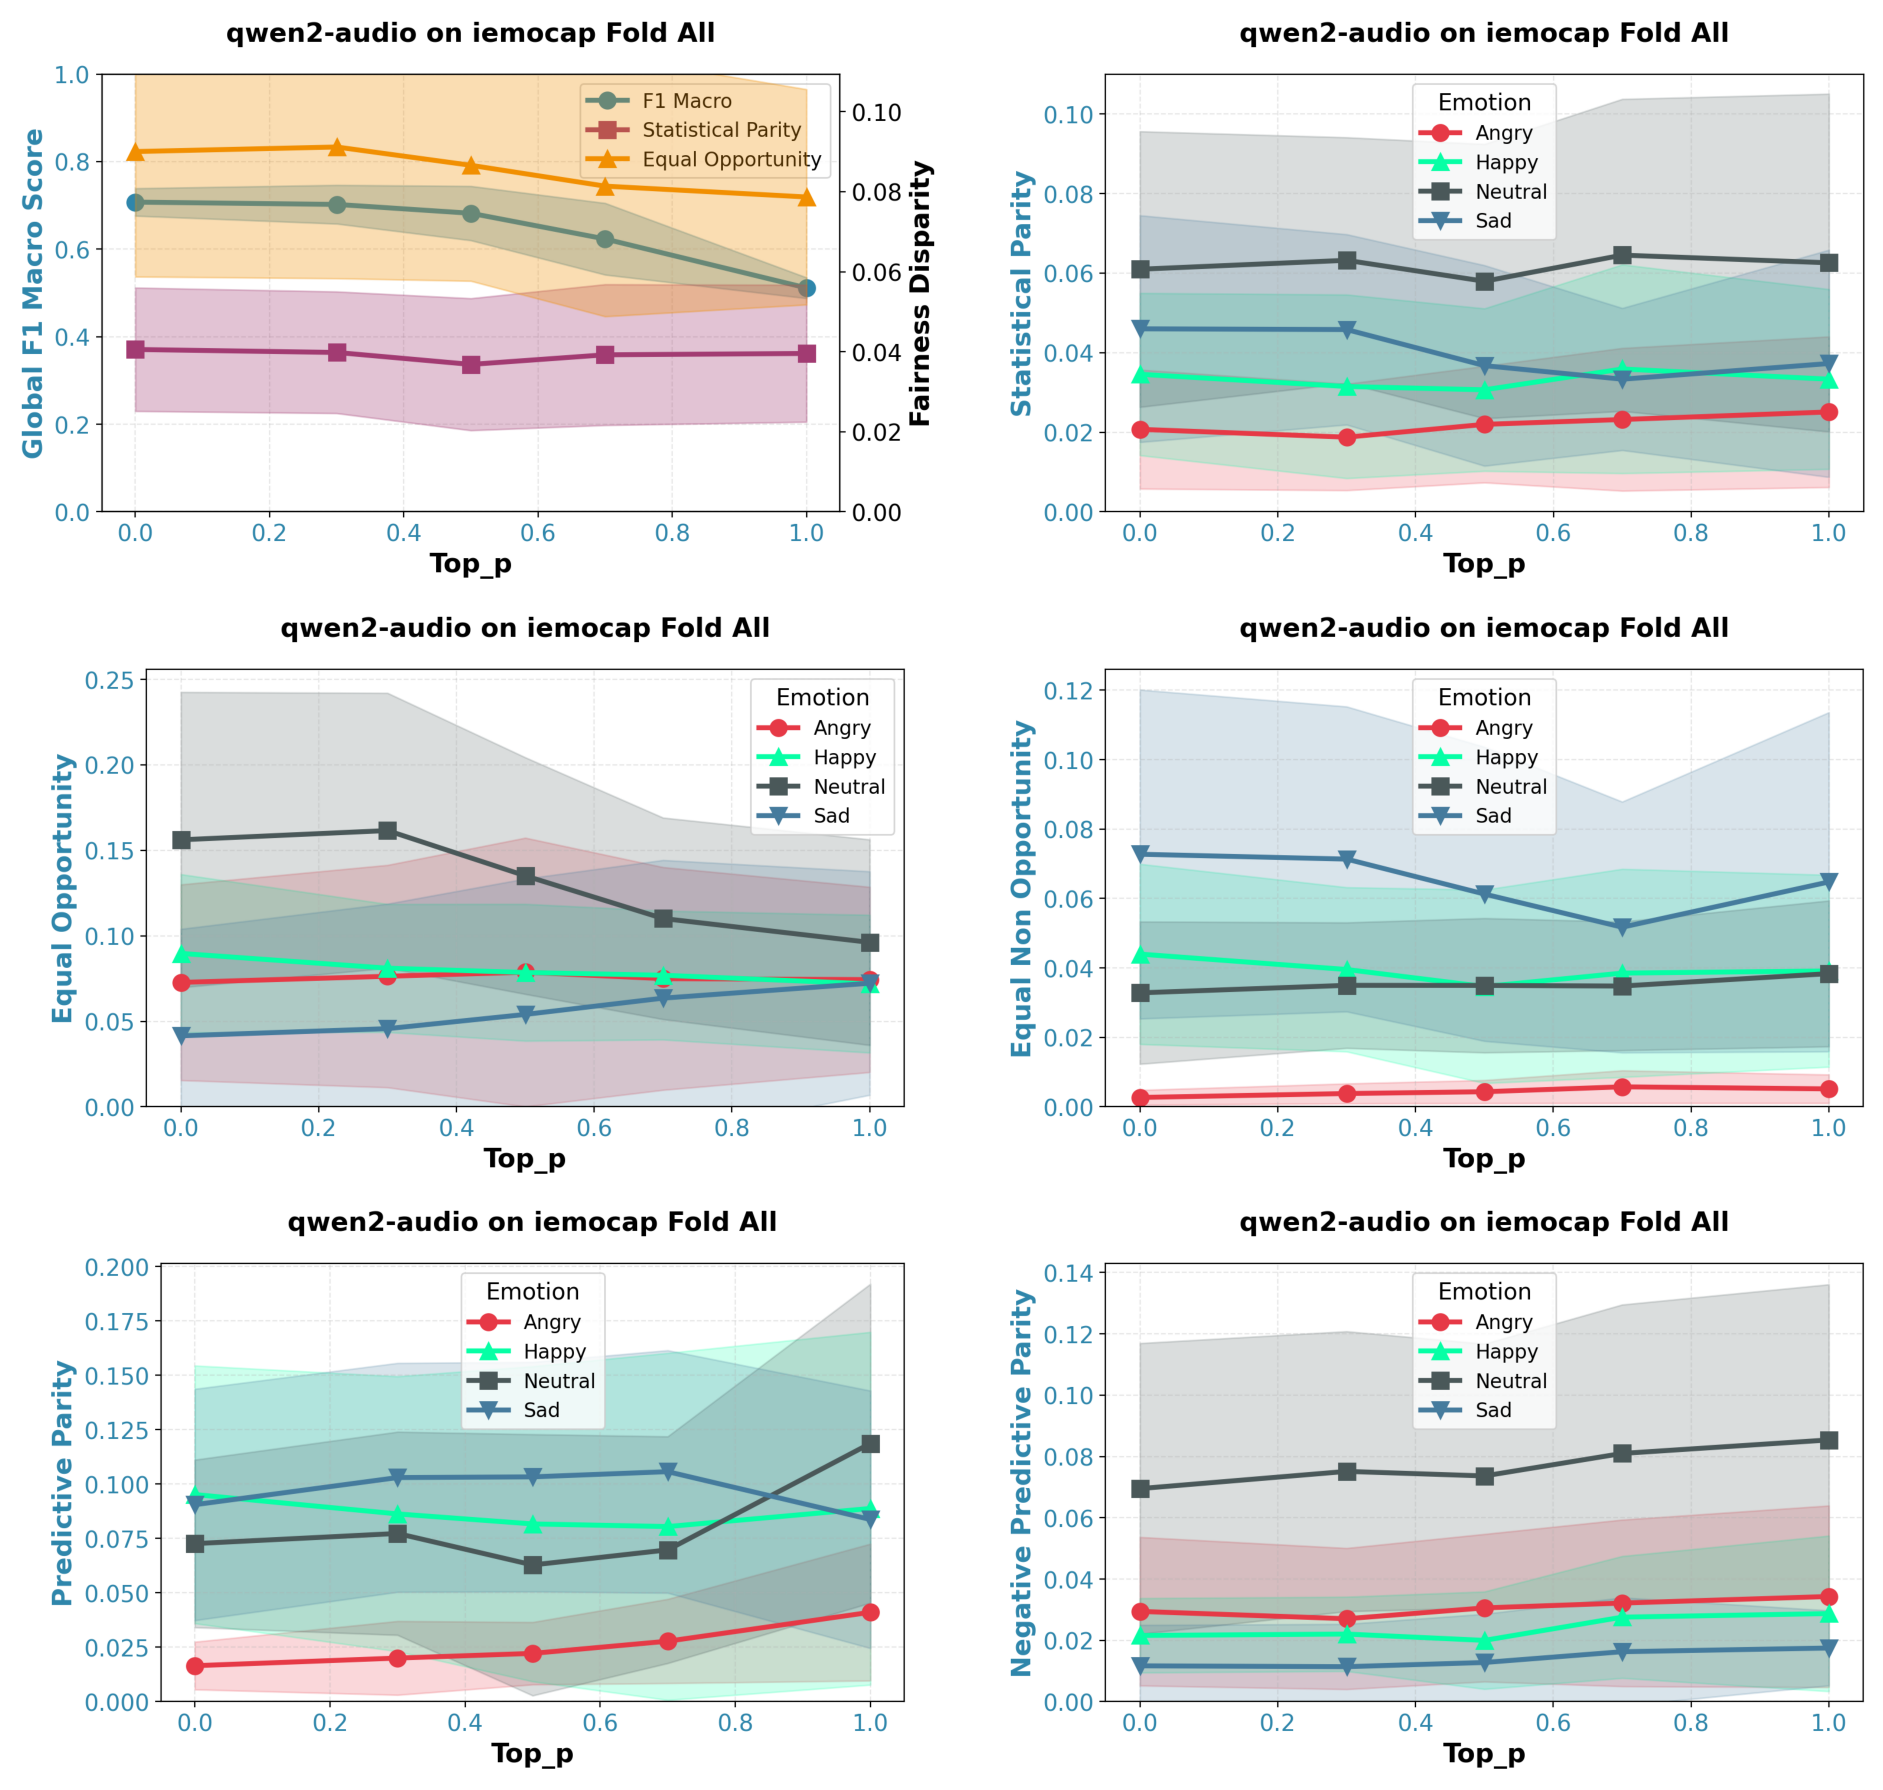

In [39]:
show_std = True
with FigureCollector() as collector:
    plot_fairness_vs_hparam(df, hparam, ['statistical_parity', 'equal_opportunity'], model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'statistical_parity', model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'equal_opportunity', model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'equal_non_opportunity', model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'predictive_parity', model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'negative_predictive_parity', model, dataset, fold, show_std=show_std)
    
collector.display_grid(nrows=3, ncols=2, figsize=(20, 18))
        # , title=f'Fairness Metrics by Emotion - {model} on {dataset} Fold {fold}')

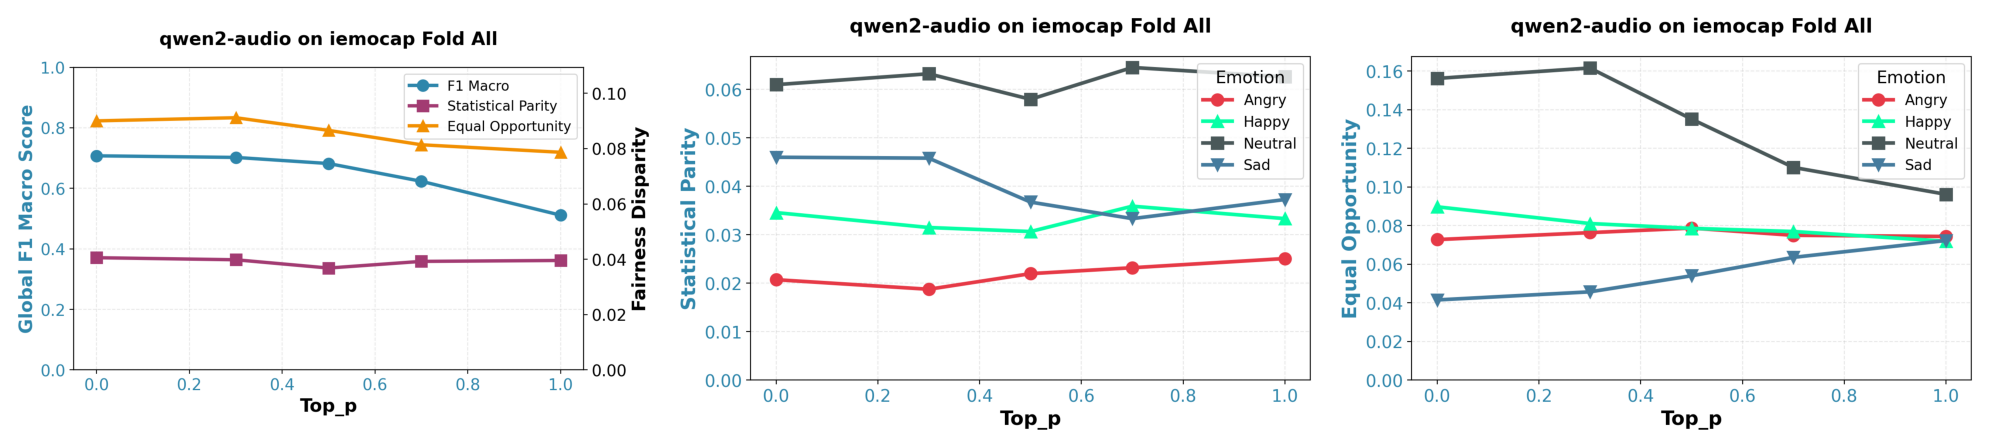

In [41]:
show_std = False
with FigureCollector() as collector:
    plot_fairness_vs_hparam(df, hparam, ['statistical_parity', 'equal_opportunity'], model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'statistical_parity', model, dataset, fold, show_std=show_std)
    plot_fairness_by_emotion(df, hparam, 'equal_opportunity', model, dataset, fold, show_std=show_std)
    
collector.display_grid(nrows=1, ncols=3, figsize=(20, 18))